In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [16]:
# Load the dataset from the file path
file_path = "C:\\Users\\Nirusan03\\PycharmProjects\\MIS710_Course_Work\\LA4PSchools.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,StudentID,Gender,Year_02,Kinder_Age,Disability,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,SN35433053,Male,2020,5.5,Disability_Non-disable,0,104,104,3,3,...,49,4,5,2,2,2,4,2,2,False
1,SN71277215,Female,2018,5.8,Disability_Non-disable,0,112,112,2,2,...,37,2,1,1,1,2,3,0,2,False
2,SN40883127,Male,2021,5.9,Disability_Non-disable,0,120,109,2,2,...,30,2,1,1,2,2,1,2,1,False
3,SN93063777,Male,2021,5.7,Disability_Non-disable,0,95,93,2,1,...,30,2,3,1,2,1,5,2,2,False
4,SN84195329,Male,2021,5.8,Disability_Non-disable,0,98,98,1,1,...,32,2,4,2,2,2,4,1,1,True


In [3]:
# Data preprocessing function
def preprocess_data(data):
    # Convert 'Year3_Writing_At_Risk' to int (True/False -> 1/0)
    data['Year3_Writing_At_Risk'] = data['Year3_Writing_At_Risk'].astype(int)

    # One-hot encode categorical variables ('Gender', 'Disability')
    categorical_features = ['Gender', 'Disability']
    data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    # Split the data into features (X) and target (y)
    X = data_encoded.drop(columns=['StudentID', 'Year3_Writing_At_Risk'])  # Drop 'StudentID' and target column
    y = data_encoded['Year3_Writing_At_Risk']  # Target variable

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Scale the features
    scaler = StandardScaler()
    X_resampled_scaled = scaler.fit_transform(X_resampled)

    return X_resampled_scaled, y_resampled

# Preprocess the dataset
X_scaled, y = preprocess_data(data)

# Display the preprocessed data
X_scaled[:5]

array([[ 0.93248573,  0.67523866, -0.27690204,  0.18031462,  0.270408  ,
         0.72890437,  1.58347435,  0.70921173,  0.29321616,  1.72458238,
         3.5668862 ,  3.21112268, -0.86936599, -1.00711596,  1.03816327,
         0.71157488,  0.99333497,  0.76021111,  1.36899497,  1.3793143 ,
        -0.01284237,  1.93799369,  2.57010192,  2.19173869,  1.954944  ,
         0.65742101,  0.92718702,  1.69146527,  1.27383031,  0.39570689,
         0.83627929,  0.64042798, -0.21030218, -0.06997444, -0.22905345],
       [-0.30341687,  1.57850857, -0.27690204,  1.02896629,  1.14502358,
        -0.30662111,  0.37191439,  0.70921173,  1.5251858 ,  1.72458238,
        -0.34631586, -0.49958945,  2.70158261,  1.05424605, -0.31066537,
        -0.42162157, -0.73798478, -0.36201864, -1.08370469, -1.33201297,
         1.61487482,  0.76277576,  0.42694458, -1.59615366,  0.11450978,
        -0.90864975,  0.92718702,  0.80624963, -1.16155433,  0.39570689,
        -1.19577276,  0.64042798, -0.21030218, -0.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2134, 35), (534, 35), (2134,), (534,))

In [5]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
    'class_weight': ['balanced']             # Handling class imbalance
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [6]:
# Predict on the test set using the best model from GridSearchCV
rf_predictions = grid_rf.best_estimator_.predict(X_test)

# Evaluate the model performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print the results
print("Random Forest Best Parameters:", grid_rf.best_params_)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Classification Report:\n", rf_report)

Random Forest Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 80.90%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       279
           1       0.80      0.80      0.80       255

    accuracy                           0.81       534
   macro avg       0.81      0.81      0.81       534
weighted avg       0.81      0.81      0.81       534



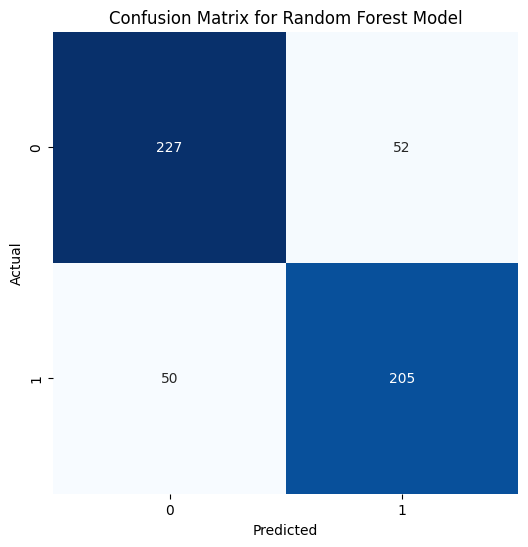

In [7]:
# Plot confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

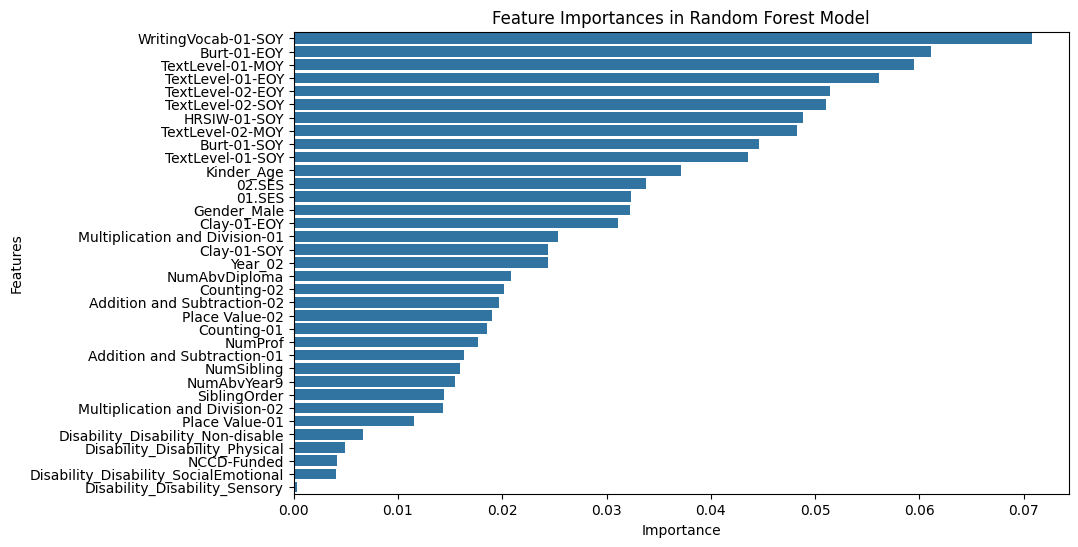

In [9]:
# Feature importance plot
importances = grid_rf.best_estimator_.feature_importances_

# Get the correct feature names from the training set after one-hot encoding
encoded_feature_names = pd.get_dummies(data.drop(columns=['StudentID', 'Year3_Writing_At_Risk']), columns=['Gender', 'Disability'], drop_first=True).columns

# Create a DataFrame for feature importances
features = pd.DataFrame(importances, index=encoded_feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=features['Importance'], y=features.index)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

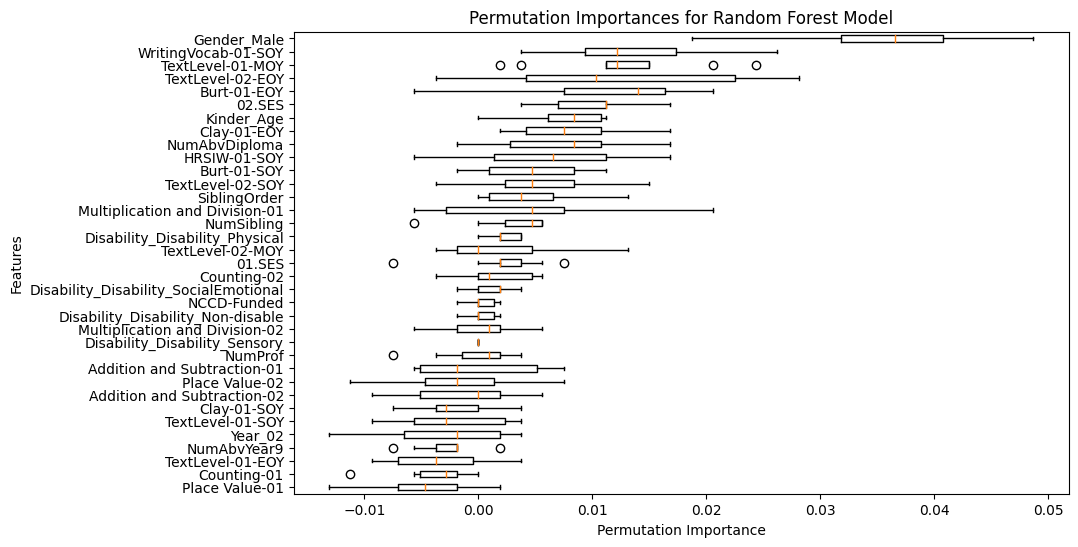

In [11]:
# Permutation importance
perm_importance = permutation_importance(grid_rf.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

# Get the correct feature names after one-hot encoding
encoded_feature_names = pd.get_dummies(data.drop(columns=['StudentID', 'Year3_Writing_At_Risk']), columns=['Gender', 'Disability'], drop_first=True).columns

# Sort the indices based on importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=encoded_feature_names[sorted_idx])
plt.title('Permutation Importances for Random Forest Model')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.show()

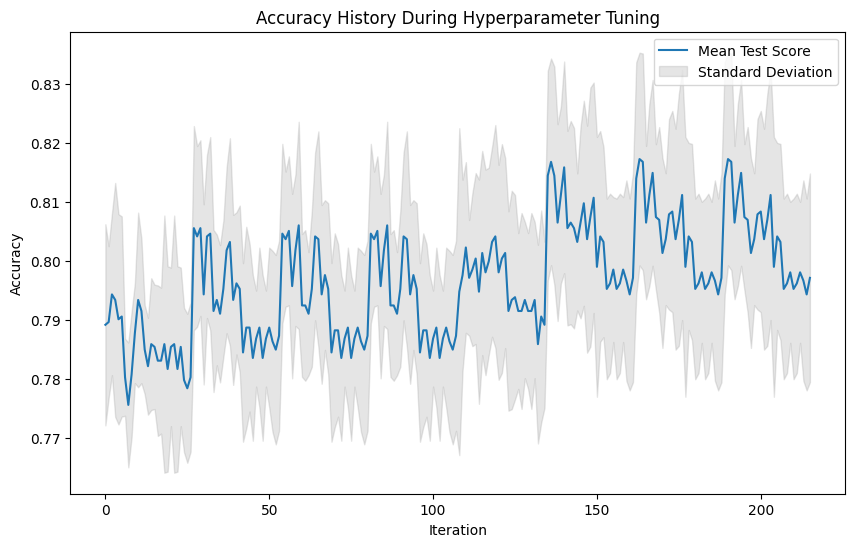

In [12]:
# Plot Accuracy History during grid search
results = grid_rf.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['mean_test_score'], label='Mean Test Score')
plt.fill_between(range(len(results['mean_test_score'])), 
                 results['mean_test_score'] - results['std_test_score'], 
                 results['mean_test_score'] + results['std_test_score'], 
                 color='gray', alpha=0.2, label='Standard Deviation')
plt.title('Accuracy History During Hyperparameter Tuning')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Identify students predicted to be at risk ('At Risk' = 1)
at_risk_rf = X_test[rf_predictions == 1]

# Print the results
print("\nStudents at Risk (Random Forest):\n", at_risk_rf)


Students at Risk (Random Forest):
 [[-0.30341687  1.87959854  3.6113855  ... -0.21030218 -0.06997444
  -0.22905345]
 [-1.53931947 -1.13130116 -0.27690204 ... -0.21030218 -0.06997444
  -0.22905345]
 [-0.92136817 -0.55189813 -0.27690204 ... -0.21030218 -0.06997444
  -0.22905345]
 ...
 [ 0.31453443  1.50770678 -0.27690204 ... -0.21030218 -0.06997444
  -0.22905345]
 [ 0.93248573 -0.26043181 -0.27690204 ...  4.75506251 -0.06997444
  -0.22905345]
 [-1.53931947  0.37414869 -0.27690204 ... -0.21030218 -0.06997444
  -0.22905345]]


In [ ]:
### 1. SES Backgrounds of Students (Year 1 and Year 2)
### - Based on the analysis of SES distribution, the students’ SES scores vary around [SES average]. Year 1 and Year 2 have [comparison to national averages].

### 2. Burt Reading Scores (Year 1 and Year 2)
### - The analysis shows that Burt Reading Scores generally [improve/remain the same/decline] from the start to the end of Year 1 and Year 2. There is [some/no] improvement.

### 3. Writing Skills in Year 1 and Risk (Logistic Regression)
### - Logistic Regression results indicate a strong relationship between WritingVocab-01-SOY and Year3_Writing_At_Risk, with low writing scores increasing the likelihood of being at risk.

### 4. Literacy and Numeracy Skills (Correlation)
### - Literacy and Numeracy are [strongly/moderately] correlated. Students with high literacy scores generally have high numeracy scores, and both affect Year3_Writing_At_Risk.

### 5. Disability and Writing At-Risk (Random Forest)
### - Disability conditions show a [significant/small] relationship with Year3_Writing_At_Risk. Students with disabilities are [more/less] likely to be at risk of underperforming in writing.

### 6. Insights for Early Interventions (K-Means)
### - K-Means clustering reveals distinct groups of students based on their writing and reading skills. These clusters suggest that [specific group] needs targeted interventions to improve their writing skills.